In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./titanic_data/train.csv')
test = pd.read_csv('./titanic_data/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

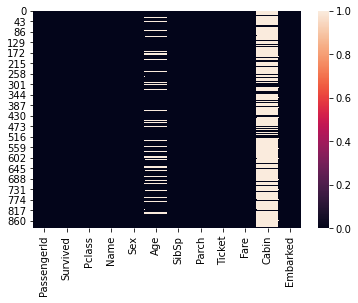

In [7]:
sns.heatmap(train.isnull())

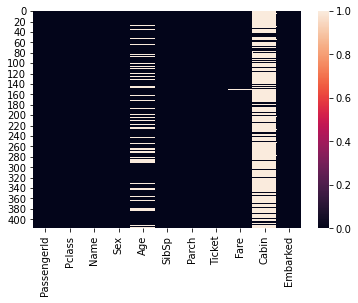

In [8]:
sns.heatmap(test.isnull())

In [9]:
# Column value is str
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
# Cloumn value is num
numerical_features = [features for features in train.columns if train[features].dtypes != 'O']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

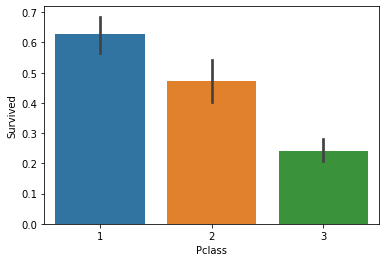

In [11]:
# the relation between Pclass & Survived
sns.barplot(x = "Pclass", y = "Survived", data = train)

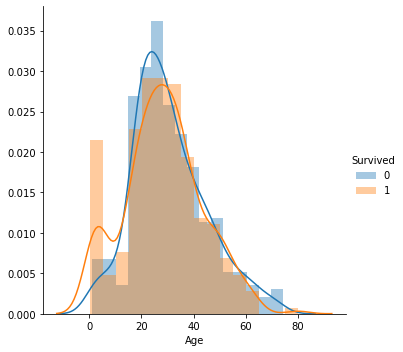

In [12]:
#plotting age feature
sns.FacetGrid(train, hue="Survived", size = 5).map(sns.distplot, "Age").add_legend()
plt.show()

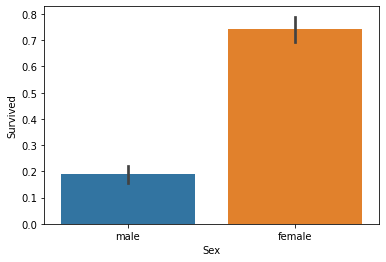

In [13]:
#plot depicting the relation between Gender and Passengers Survived
sns.barplot(x = "Sex", y = "Survived", data = train)

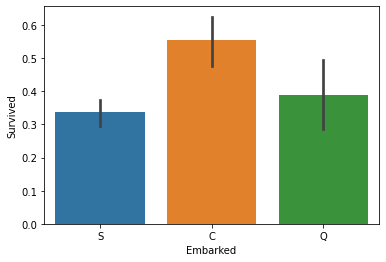

In [14]:
#plot depicting the relation between Embarked(Port of Embarkation) and Passengers Survived
sns.barplot(x = "Embarked", y = "Survived", data=train)

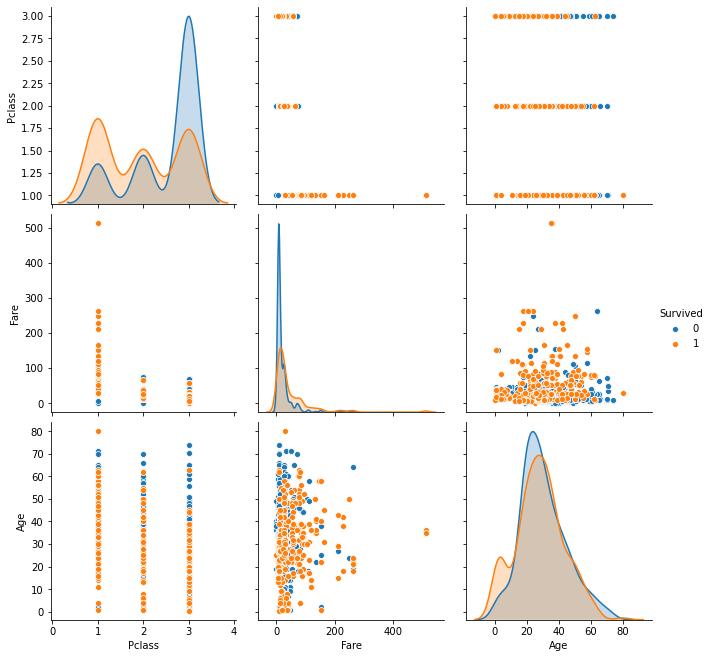

In [15]:
sns.pairplot(train[["Survived","Pclass","Fare","Age"]], hue="Survived", height=3);
plt.show()

In [16]:
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
ntrain = train.shape[0]

In [18]:
# Concat two data set
all_data = pd.concat((train, test)).reset_index(drop = True)

# Drop the column 'Survived' for training
all_data.drop(['Survived'], axis=1, inplace = True)

# print("all_data size is : {}".format(all_data.shape))
# the expected output will be (1309, 11)

In [19]:
all_data.isnull().sum()
#give up the column of Cabin because it take high amount of missing values(>50%)

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
all_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
# get the median age of each Pclass
age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
        
print('Median age of all passengers: {}'.format(all_data['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [22]:
# Fill the null record of column 'Age' with median that consider its Pclass
all_data['Age'] = all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
all_data['Age'].isnull().sum()

0

In [23]:
all_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
# Filling the missing value in Embarked by mode(most freqquent) value
mode = all_data['Embarked'].mode()
all_data['Embarked'] = all_data['Embarked'].fillna('mode')

In [25]:
# Filling fare
med_fare = all_data.groupby(['Pclass','Parch','SibSp']).Fare.median()[3][0][0]
med_fare

7.8542

In [26]:
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

In [27]:
# Checking all the missing data
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [28]:
# Create the new column call 'Family_size'
# Family size is sum of SibSp(siblings spouses aboard the Titanic) and Parch(parents children aboard the Titanic)
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [29]:
# Creating column title
all_data['Title'] = all_data['Name'].str.split(', ', expand = True)[1].str.split('.', expand=True)[0]
all_data['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [30]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,1,Mr


In [31]:
all_data['FarePerPerson'] = all_data['Fare'] / all_data['Family_size']
all_data['FarePerPerson']

0         3.625000
1        35.641650
2         7.925000
3        26.550000
4         8.050000
           ...    
1304      8.050000
1305    108.900000
1306      7.250000
1307      8.050000
1308      7.452767
Name: FarePerPerson, Length: 1309, dtype: float64

In [32]:
# Dropping columns that are not important
all_data.drop(['Ticket', 'Fare', 'SibSp', 'Name', 'Parch', 'Cabin'], axis = 1, inplace = True)
all_data

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,male,22.0,S,2,Mr,3.625000
1,2,1,female,38.0,C,2,Mrs,35.641650
2,3,3,female,26.0,S,1,Miss,7.925000
3,4,1,female,35.0,S,2,Mrs,26.550000
4,5,3,male,35.0,S,1,Mr,8.050000
...,...,...,...,...,...,...,...,...
1304,1305,3,male,25.0,S,1,Mr,8.050000
1305,1306,1,female,39.0,C,1,Dona,108.900000
1306,1307,3,male,38.5,S,1,Mr,7.250000
1307,1308,3,male,25.0,S,1,Mr,8.050000


In [33]:
categorical_features = [features for features in all_data.columns if all_data[features].dtypes =='O']
categorical_features

['Sex', 'Embarked', 'Title']

In [34]:
from sklearn.preprocessing import LabelEncoder

# Process columns, apply LabelEncoder to categorical features
lbl = LabelEncoder()
lbl.fit(list(all_data['Title'].values)) 
all_data['Title'] = lbl.transform(list(all_data['Title'].values))

In [35]:
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

In [36]:
lbl.fit(list(all_data['Embarked'].values)) 
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

In [37]:
# Now all the records are num
all_data

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.625000
1,2,1,0,38.0,0,2,13,35.641650
2,3,3,0,26.0,2,1,9,7.925000
3,4,1,0,35.0,2,2,13,26.550000
4,5,3,1,35.0,2,1,12,8.050000
...,...,...,...,...,...,...,...,...
1304,1305,3,1,25.0,2,1,12,8.050000
1305,1306,1,0,39.0,0,1,3,108.900000
1306,1307,3,1,38.5,2,1,12,7.250000
1307,1308,3,1,25.0,2,1,12,8.050000


In [38]:
# Seperating data
train = all_data[:ntrain]
test = all_data[ntrain:]

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
x = train
x

,PassengerId,Pclass,Sex,Age,Embarked,Family_size,Title,FarePerPerson
0,1,3,1,22.0,2,2,12,3.62500
1,2,1,0,38.0,0,2,13,35.64165
2,3,3,0,26.0,2,1,9,7.92500
3,4,1,0,35.0,2,2,13,26.55000
4,5,3,1,35.0,2,1,12,8.05000
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,2,1,15,13.00000
887,888,1,0,19.0,2,1,9,30.00000
888,889,3,0,22.0,2,4,9,5.86250
889,890,1,1,26.0,0,1,12,30.00000


In [41]:
rd = RandomForestClassifier(n_estimators = 1000)
rd.fit(x, y_train)

RandomForestClassifier(n_estimators=1000)

In [42]:
finalMdR = rd.predict(test)

In [43]:
ID = test['PassengerId']
submission = pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = finalMdR
submission.to_csv('submissionrd.csv', index = False)